# Introduction:

Audio is an extremely rich data source. Depending on the sample rate — which we will define soon — one second of data could contain thousands of points. Scale this up to hours of recorded audio, and you can see how Machine Learning and Data Science nicely intertwine with signal processing techniques. However, we must start at the basics of digital signal processing techniques and understand what signals are, how we record them, and how we can utilize them in a digital space.

# Wave Forms:

Waves are repeated signals that oscillate and vary in amplitude, depending on their complexity. In the real world, waves are continuous and mechanical — which is quite different from computers being discrete and digital.

So, how do we translate something continuous and mechanical into something that is discrete and digital? This is where the sample rate comes in. Formally defined, the sample rate is the number of points per second that is used to trace the signal. 

Say, for example, the sample rate of a recorded is is 100. This means that for every recorded second of audio, the computer will place 100 points along the signal in attempts to best track the shape of the continuous curve. Once all the points are in place, a smooth curve joins them all together for humans to be able to visualize the sound. Since the recorded audio is in terms of amplitude and time, we can intuitively say that the wave form operates in the time domain.

Simply put, what resolution is to photos, sample rate is to audio. To better understand what something like this sounds like, we will look snippets of songs across various sample rates.

In [1]:
# Import necessary packages
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the wav files. It will be loaded in as a numpy array.
# sr represents the samplerate.
# Since we did not specify the samplerate when loading in the files, the default will be set to 22050.
rb, sr = librosa.load('snippets/rb.wav')
rap, _ = librosa.load('snippets/rap.wav')
rock, _ = librosa.load('snippets/rock.wav')

As mentioned in the comments of the above segement of code, if we do not specify the sample rate of the audio it will default to 22050 Hz, or 22.05 kHz. To show the importance of the sample rate and how it affects audio quality overall. 

We will load in the R&B snippet at various sample rates and visualize the differences. 

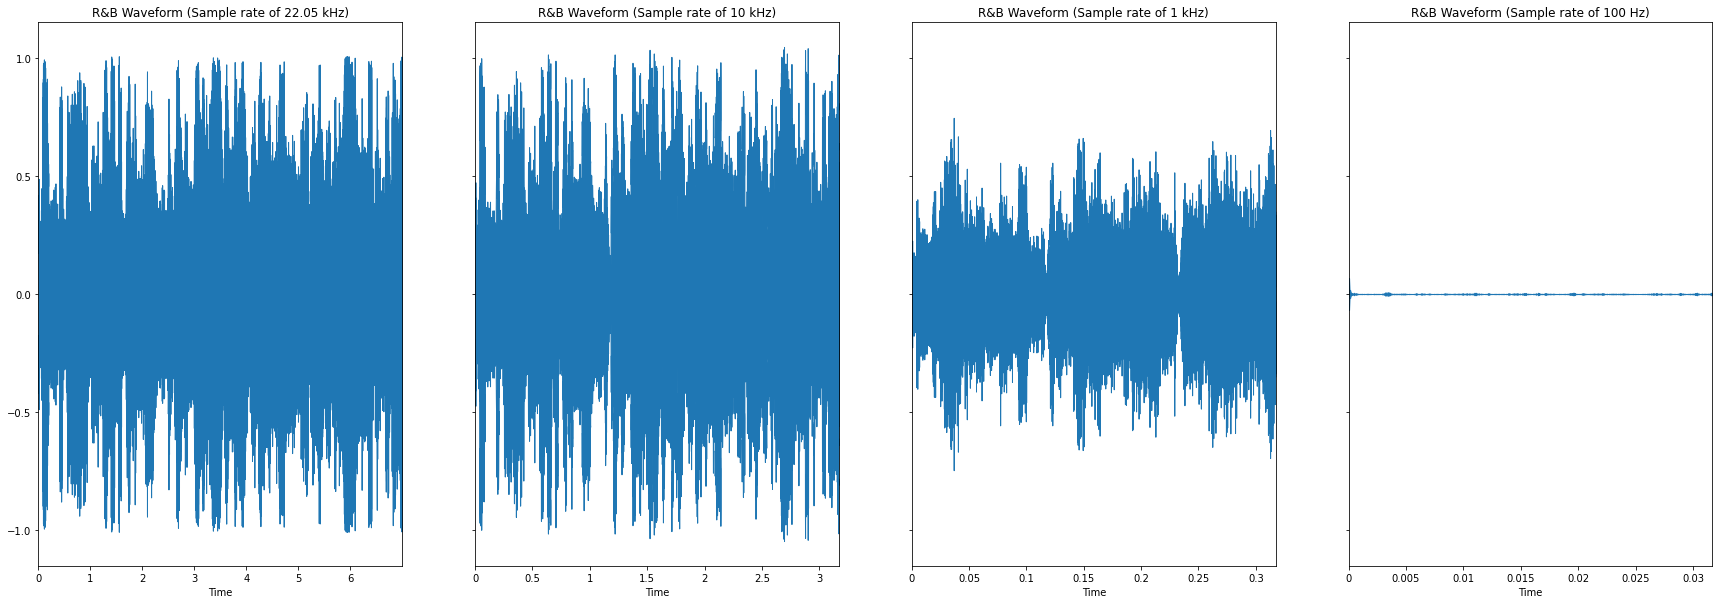

In [9]:
rb10k, _ = librosa.load('snippets/rb.wav', sr=10000)
rb1k, _ = librosa.load('snippets/rb.wav', sr=1000)
rb100, _ = librosa.load('snippets/rb.wav', sr=100)
#Visualizing waveforms
fig, ax = plt.subplots(1,4, figsize = (30,10), sharey = True)
librosa.display.waveplot(rb, sr=sr, ax=ax[0])
ax[0].set(title = 'R&B Waveform (Sample rate of 22.05 kHz)')
librosa.display.waveplot(rb10k, sr=sr, ax=ax[1])
ax[1].set(title = 'R&B Waveform (Sample rate of 10 kHz)')
librosa.display.waveplot(rb1k, sr=sr, ax=ax[2])
ax[2].set(title = 'R&B Waveform (Sample rate of 1 kHz)')
librosa.display.waveplot(rb100, sr=sr, ax=ax[3])
ax[3].set(title = 'R&B Waveform (Sample rate of 100 Hz)')
plt.show()

As we can see, not only does the resolution of the amplitudes diminish significantly, but also the length in which the entire song dwindles too. 

Now, we visualize all of the wave forms of the genres at sample rate of 22.05 kHz.

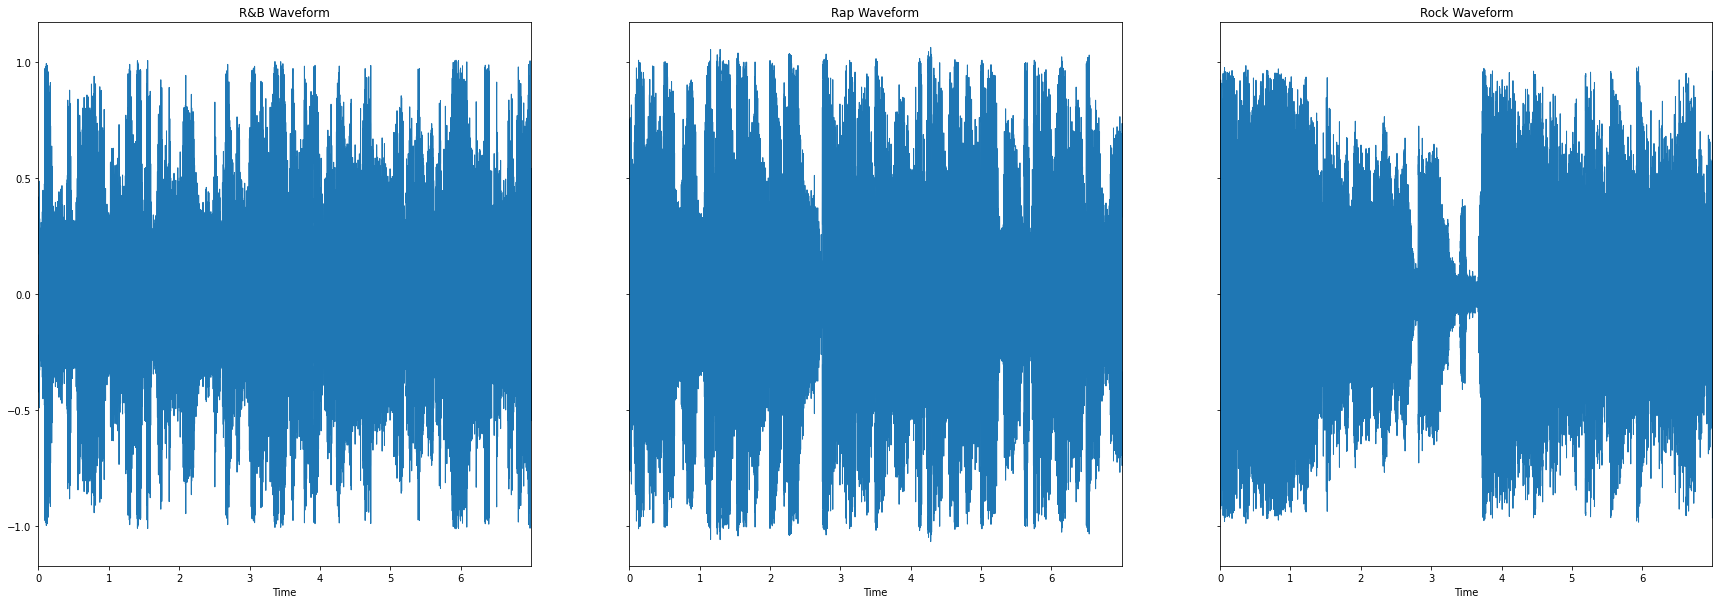

In [4]:
#Visualizing waveforms
fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
librosa.display.waveplot(rb, sr=sr, ax=ax[0])
ax[0].set(title = 'R&B Waveform')
librosa.display.waveplot(rap, sr=sr, ax=ax[1])
ax[1].set(title = 'Rap Waveform')
librosa.display.waveplot(rock, sr=sr, ax=ax[2])
ax[2].set(title = 'Rock Waveform')
plt.show()